<center><h1>Optimisation des portefeuilles d'investissement</h1></center>
<center><h3>Réalisé par: Chaima Dakhlaoui et Malek Hattab</h3><center>

# Introduction
La Théorie du portefeuille ( TP ) est une théorie économique qui permet d'expliquer comment les investisseurs peu enclins au risque peuvent construire des portefeuilles pour optimiser (ou maximiser) le rendement attendu en fonction d'un niveau de risque de marché donné. Il a été formulé par H. Markowitz et bien qu’il ne soit pas la seule technique d’optimisation connue, il est le plus largement utilisé.

l'approche de cette discipline suppose que tous les investisseurs sont réticents au risque, c’est-à-dire s’il y a un choix entre les portefeuilles à faible risque et les portefeuilles à risque élevé avec les mêmes rendements, un investisseur en choisira un avec le faible risque.

## 1/ Description du projet:
L'objectif de ce projet est de realiser une application pratique d'optimisation de portefeuille, concretement nous essayerons de construire un profil de portefeuille qui fournir un rendement maximal et un risque minimum à travers l'analyse moyenne-variance.

In [33]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
from scipy.stats import norm
from scipy import stats
from scipy.stats import kurtosistest, skewtest
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings('ignore')
sns.set(style='darkgrid')

In [34]:
df = pd.read_excel("C:/Users/Chaima8/Documents/simulation/stocks.xlsx")

### 1/ 1- Description du jeu de données 
Nous utilisons pour ce projet quatre actions recoltés sur yahoo finance pour construire notre portefeuille :

Apple (AAPL)
Amazon (AMZN)
Google (GOOG)
Netflix (NFLX)

Notre ensemble de données s'étend de 2020 à 2024 et contient des observations quotidiennes sur le Cours de clôture ajusté en fonction des dividendes et des fractionnements.

In [35]:
df.head()

,Date,Adj Close,symbol
0,2020-04-27,69.043907,AAPL
1,2020-04-28,67.924751,AAPL
2,2020-04-29,70.155746,AAPL
3,2020-04-30,71.635773,AAPL
4,2020-05-01,70.482475,AAPL


## 2/ Prétraitement

In [36]:
def missing_value(data):
    d1 = data.isna().sum().to_frame()
    d2 = (data.isna().sum() / data.shape[0]).to_frame()
    d3 = data.dtypes.to_frame()
    df_missing = pd.concat([d1,d2,d3],axis = 1)
    df_missing.columns = ['missing value','% of missing value','dtypes']
    print('='*100)
    if (df_missing.iloc[:,0].any() !=0):
        print("Notre dataframe comporte " + str(data.shape[1]) + 
      " colonnes. Et il y a " + str(df_missing.shape[0]) + " colonnes qui ont des valeurs manquantes.")
    else:
        print("Notre dataframe comporte " + str(data.shape[1]) + 
      " colonnes. Et il n'y a aucun colonnes qui à des valeurs manquantes.")
    print('-'*100)
    print(df_missing)

In [37]:
missing_value(df)

Notre dataframe comporte 3 colonnes. Et il n'y a aucun colonnes qui à des valeurs manquantes.
----------------------------------------------------------------------------------------------------
           missing value  % of missing value          dtypes
Date                   0                 0.0  datetime64[ns]
Adj Close              0                 0.0         float64
symbol                 0                 0.0          object


## 3/ CONSTRUCTION ET VISUALISATION DU PORTEFEUILLE

### 3.1 CONSTRUCTION DU PORTEFEUILLE


In [38]:
stock_price = df.pivot(index='Date', columns='symbol',values = 'Adj Close')
stock_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2020-04-27 to 2024-04-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    1007 non-null   float64
 1   AMZN    1007 non-null   float64
 2   GOOG    1007 non-null   float64
 3   NFLX    1007 non-null   float64
dtypes: float64(4)
memory usage: 39.3 KB


#### Remarque: 
On peut remarquer que notre jeu de données contient 4028 observations au total avec 1007 observations par action sur une periode allant de 2020-04-27 au 2024-04-25.

In [39]:
print(stock_price.head())

symbol           AAPL        AMZN       GOOG        NFLX
Date                                                    
2020-04-27  69.043907  118.800003  63.793999  421.380005
2020-04-28  67.924751  115.704002  61.683498  403.829987
2020-04-29  70.155746  118.635498  67.073997  411.890015
2020-04-30  71.635773  123.699997  67.432999  419.850006
2020-05-01  70.482475  114.302002  66.030502  415.269989


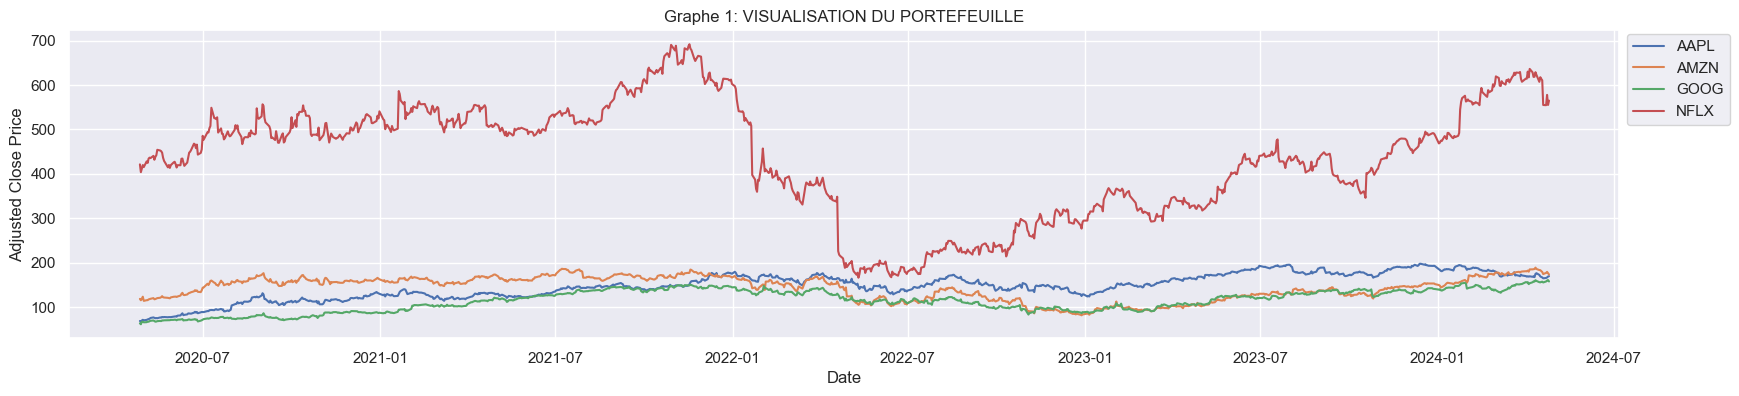

In [40]:
plt.figure(figsize=(20, 4))
plt.plot(stock_price)
plt.legend([c for c in stock_price.columns], loc='center left', bbox_to_anchor=(1, 0.84))
plt.title('Graphe 1: VISUALISATION DU PORTEFEUILLE')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

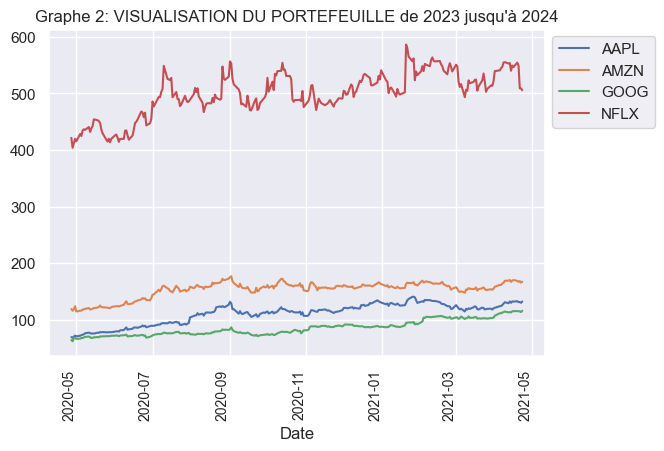

In [41]:
stock_price.loc['2020-04-25':'2021-04-25'].plot()
plt.legend([c for c in stock_price.columns],loc='center left', bbox_to_anchor=(1, 0.84))
plt.xticks(rotation='vertical',size=10)
plt.title("Graphe 2: VISUALISATION DU PORTEFEUILLE de 2023 jusqu'à 2024");

## 4/ STATISTIQUES DESCRIPTIVE DU PORTEUFEUILLE


In [42]:
stock_price.describe().T

,count,mean,std,min,25%,50%,75%,max
symbol,,,,,,,,
AAPL,1007.0,147.759508,28.511953,67.924751,128.884979,148.116486,170.854012,197.857529
AMZN,1007.0,142.808397,26.515944,81.820000,122.443249,150.443497,164.344750,189.050003
GOOG,1007.0,114.933835,24.204023,61.683498,95.450001,117.237999,136.509499,161.100006
NFLX,1007.0,436.777130,126.725807,166.369995,343.925003,459.890015,525.459992,691.690002


### coefficient de variation

Le coefficient de variation (CV) est une mesure de la variabilité relative d'un ensemble de données. Il est utilisé pour comparer la dispersion des données par rapport à leur valeur moyenne. Le coefficient de variation est souvent exprimé en pourcentage et est calculé en divisant l'écart type par la moyenne, puis en multipliant le résultat par 100.

Mathématiquement, le coefficient de variation (CV) est défini comme :

$𝐶𝑉 =(𝜎/𝜇)×100$

Où :

* σ est l'écart type (la mesure de la dispersion des données autour de la moyenne).
* μ est la moyenne (la valeur moyenne des données).
Le coefficient de variation est utile lorsqu'on compare des ensembles de données qui ont des moyennes différentes. Il permet de normaliser la dispersion des données par rapport à leur moyenne, ce qui permet des comparaisons plus significatives.

Voici quelques points à retenir sur le coefficient de variation :

* Plus le coefficient de variation est faible, moins la dispersion des données par rapport à leur moyenne est importante.
* Un coefficient de variation élevé indique une grande dispersion des données par rapport à leur moyenne.

In [43]:
def coefficient_of_variation(data_set):
    CV = (data_set.describe().iloc[2] / data_set.describe().iloc[1])
    return CV

In [44]:
print('='*25)
print('Coefficient de variation')
print('-'*25)
print(coefficient_of_variation(stock_price))
print('='*25)

Coefficient de variation
-------------------------
symbol
AAPL    0.192962
AMZN    0.185675
GOOG    0.210591
NFLX    0.290138
dtype: float64


In [45]:
def pct_plot(stocks_data):
    fig = plt.figure(figsize=(12,12))
    for i, column in enumerate(stocks_data.columns):
        plt.subplot(4,2,i+1)
        plt.plot(np.log(1 + stocks_data[column].pct_change()), color='r')
        plt.xticks(size=10)
        plt.title(column)
    
    fig.tight_layout()
    plt.show()

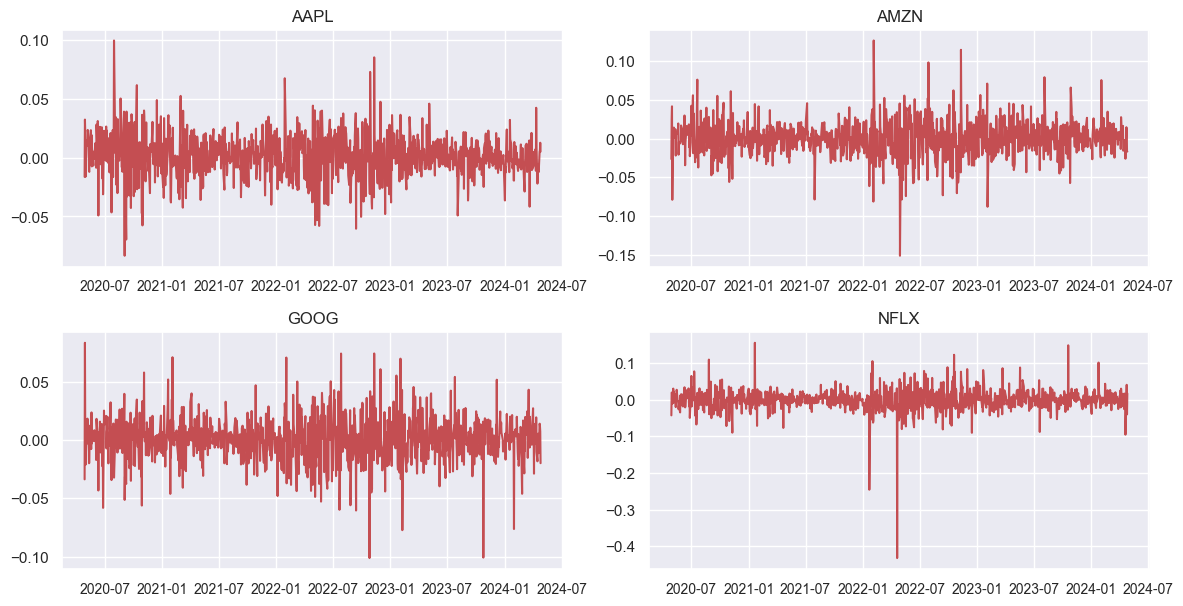

In [46]:
pct_plot(stock_price)

### Interprétations
* AAPL:

La moyenne du cours de clôture ajusté pour AAPL est d'environ 147.76 USD, avec une variabilité de ±28.51 USD par rapport à cette moyenne (écart-type).
Le cours de clôture ajusté le plus bas (min) est de 67.92 USD, tandis que le plus élevé (max) est de 197.86 USD. La médiane (50e percentile) est de 148.12 USD.
Le coefficient de variation pour AAPL est d'environ 0.192962. Cela indique une variabilité relative des rendements d'environ 19.29% par rapport à la moyenne. Cette stabilité relative peut être interprétée comme une bonne prévisibilité des rendements par rapport à la moyenne.

* AMZN:

La moyenne du cours de clôture ajusté pour AMZN est d'environ 142.81 USD, avec une variabilité de ±26.52 USD par rapport à cette moyenne (écart-type).
Le cours de clôture ajusté le plus bas (min) est de 81.82 USD, tandis que le plus élevé (max) est de 189.05 USD. La médiane (50e percentile) est de 150.44 USD.
Le coefficient de variation pour AMZN est d'environ 0.185675. Cela indique une variabilité relative des rendements d'environ 18.57% par rapport à la moyenne. Cette stabilité relative suggère également une bonne prévisibilité des rendements.

* GOOG:

La moyenne du cours de clôture ajusté pour GOOG est d'environ 114.93 USD, avec une variabilité de ±24.20 USD par rapport à cette moyenne (écart-type).
Le cours de clôture ajusté le plus bas (min) est de 61.68 USD, tandis que le plus élevé (max) est de 161.10 USD. La médiane (50e percentile) est de 117.24 USD.
Le coefficient de variation pour GOOG est d'environ 0.210591. Cela indique une variabilité relative des rendements d'environ 21.06% par rapport à la moyenne. Bien que légèrement plus élevé que les deux précédents, cela reste dans une plage raisonnable de stabilité relative.

* NFLX:

La moyenne du cours de clôture ajusté pour NFLX est d'environ 436.78 USD, avec une variabilité de ±126.73 USD par rapport à cette moyenne (écart-type).
Le cours de clôture ajusté le plus bas (min) est de 166.37 USD, tandis que le plus élevé (max) est de 691.69 USD. La médiane (50e percentile) est de 459.89 USD.
Le coefficient de variation pour NFLX est d'environ 0.290138. Cela indique une variabilité relative des rendements d'environ 29.01% par rapport à la moyenne. Cette variabilité relative plus élevée suggère une volatilité plus importante par rapport à la moyenne, ce qui peut être associé à un risque plus élevé.

Text(0.5, 1.0, 'BOX PLOT')

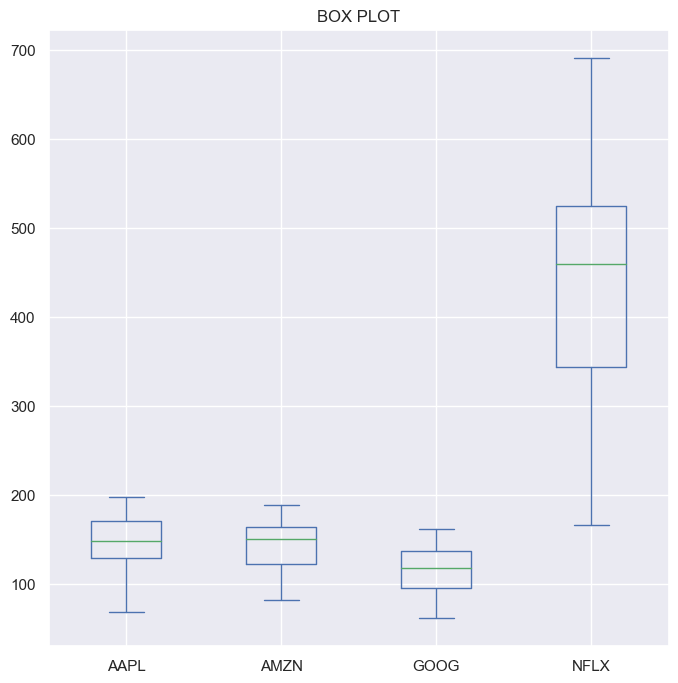

In [47]:
stock_price[['AAPL', 'AMZN', 'GOOG', 'NFLX']].plot.box(figsize=(8,8))
plt.title('BOX PLOT')

In [48]:
def metric(df):
    # skewness metric
    sk,p_vals = skewtest(df)
    skew_metric = skew(df)
    skewness = [skew_metric,sk,p_vals]
    s_stat = pd.DataFrame(data=skewness).T.round(3)
    s_stat.columns = ['skew','t-stat','p-value']
    s_stat.index = [c for c in df.columns]
    
    # kurtosis metric
    kurtos,p_valk = kurtosistest(df)
    kurtosis_metric = kurtosis(df)
    kurto = [kurtosis_metric,kurtos,p_valk]
    k_stat = pd.DataFrame(data=kurto).T.round(3)
    k_stat.columns = ['kurtosis','t-stat','p-value']
    k_stat.index = [c for c in df.columns]
    
    # affichage des resultats.
    print('')
    print('='*75)
    print('SKEWTEST RESULT: sous H0 "Distribution symetrique s = 0"')
    print('-'*75)
    print(s_stat.head())
    print('-'*75)
    
    print('')
    print('='*75)
    print('KURTOSISTEST RESULT: sous H0 "Distribution mesokuretique k = 3"')
    print('-'*75)
    print(k_stat.head())
    print('-'*75)
    
    #JB TEST
    JB =[]
    for c in df.columns:
        JB.append(list(stats.jarque_bera(df[c])))
    f = pd.DataFrame(JB).round(3)
    f.columns = ['t-stat','p-value']
    print('='*75)
    print('JARQUE - BERA TEST: sous H0 "Distribution suit une loi normale"')
    print('-'*75)
    print(f)
    print('-'*75)

In [49]:
metric(stock_price)


SKEWTEST RESULT: sous H0 "Distribution symetrique s = 0"
---------------------------------------------------------------------------
       skew  t-stat  p-value
AAPL -0.496  -6.141      0.0
AMZN -0.480  -5.953      0.0
GOOG -0.276  -3.539      0.0
NFLX -0.349  -4.427      0.0
---------------------------------------------------------------------------

KURTOSISTEST RESULT: sous H0 "Distribution mesokuretique k = 3"
---------------------------------------------------------------------------
      kurtosis  t-stat  p-value
AAPL    -0.186  -1.224    0.221
AMZN    -0.894 -11.285    0.000
GOOG    -1.040 -16.303    0.000
NFLX    -0.698  -7.107    0.000
---------------------------------------------------------------------------
JARQUE - BERA TEST: sous H0 "Distribution suit une loi normale"
---------------------------------------------------------------------------
   t-stat  p-value
0  42.818      0.0
1  72.155      0.0
2  58.176      0.0
3  40.868      0.0
---------------------------------

**Skewtest Result (Test d'asymétrie) :**
- Les valeurs de skew (s) sont négatives pour tous les symboles de stock, indiquant une asymétrie négative dans les distributions des données.
- Les p-values sont très proches de zéro, rejetant ainsi l'hypothèse nulle de symétrie.

**Kurtosistest Result (Test d'aplatissement) :**
- Les p-values sont très proches de zéro pour AMZN, GOOG et NFLX, rejetant ainsi l'hypothèse nulle de distribution mesokurtique.
- Pour AAPL, le p-value est de 0.221, ce qui ne permet pas de rejeter l'hypothèse nulle de distribution mesokurtique à un niveau de signification de 5%.

**Jarque-Bera Test Result (Test de Jarque-Bera) :**
- Les p-values sont très proches de zéro pour tous les symboles de stock, indiquant des distributions non normales.



## Etude de correlation
La corrélation dans les secteurs de la finance et de l’investissement est une statistique qui mesure dans quelle mesure deux titres se déplacent les uns par rapport aux autres. Elle est souvent utilisée pour évaluer la relation linéaire entre les rendements de différents actifs financiers, tels que les actions.

Une corrélation positive indique que les deux titres ont tendance à se déplacer dans la même direction, c'est-à-dire que lorsque le prix d'un titre augmente, le prix de l'autre titre a également tendance à augmenter. En revanche, une corrélation négative indique que les deux titres se déplacent dans des directions opposées.

Dans le contexte de l'investissement, l'étude de la corrélation entre différents titres peut aider les investisseurs à diversifier leur portefeuille en choisissant des titres qui ont une corrélation faible ou négative, réduisant ainsi le risque global du portefeuille. 

symbol      AAPL      AMZN      GOOG      NFLX
symbol                                        
AAPL    1.000000  0.008368  0.782459 -0.055403
AMZN    0.008368  1.000000  0.414641  0.811001
GOOG    0.782459  0.414641  1.000000  0.292947
NFLX   -0.055403  0.811001  0.292947  1.000000


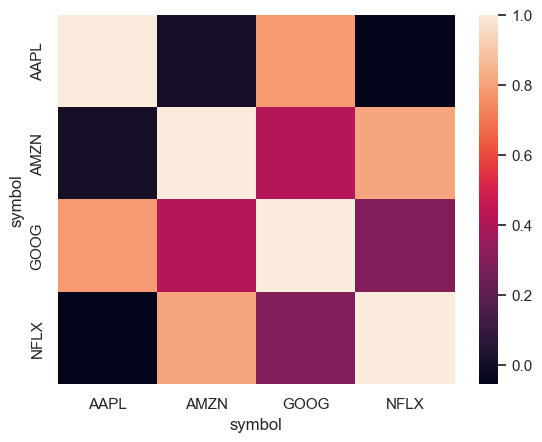

In [50]:
print(stock_price.corr())
sns.heatmap(stock_price.corr());

### Interprétations
Les actifs présentent une forte corrélation positive entre eux, avec des coefficients de corrélation tous supérieurs à 90 %, à l'exception de la corrélation entre AAPL et NFLX qui est de 87 %. En particulier, la corrélation entre AMZN et NFLX est très élevée, autour de 97 %. Cette forte corrélation suggère que les prix de ces actions ont tendance à évoluer dans la même direction.

Cependant, malgré cette forte corrélation, les actifs ne sont pas parfaitement corrélés entre eux. Cette légère variation dans les niveaux de corrélation peut être interprétée comme une diversification modérée du portefeuille. En d'autres termes, bien que les actifs soient fortement corrélés, il existe encore des différences dans leurs mouvements de prix qui permettent de réduire le risque global du portefeuille.

Par conséquent, on peut conclure que notre portefeuille est relativement diversifié, ce qui signifie que le risque global du portefeuille est inférieur au risque de chaque actif individuel qui le compose. Cela peut offrir une certaine protection contre les fluctuations de marché et contribuer à une gestion plus efficace du risque dans l'ensemble du portefeuille d'investissement.


### Transformation necessaire à l'analyse

La transformation consiste à calculer les rendements logarithmiques des prix des actions. Cela est fait pour plusieurs raisons :

1/ Stabilisation de la variance : Les rendements logarithmiques ont une variance plus stable dans le temps, facilitant ainsi l'analyse statistique.

2/ Interprétation simplifiée : Les rendements logarithmiques sont interprétés comme des taux de croissance, ce qui est plus intuitif pour les investisseurs.

3/ Linéarisation : Cette transformation permet de linéariser les relations entre les variables, facilitant l'application de techniques d'analyse statistique.

4/ Réduction des biais : Les rendements logarithmiques réduisent les biais potentiels associés aux prix des actions, améliorant ainsi la qualité de l'analyse.

In [51]:
log = np.log(1 + stock_price.pct_change())
log = log.dropna()

Text(0.5, 1.0, 'BOX PLOT')

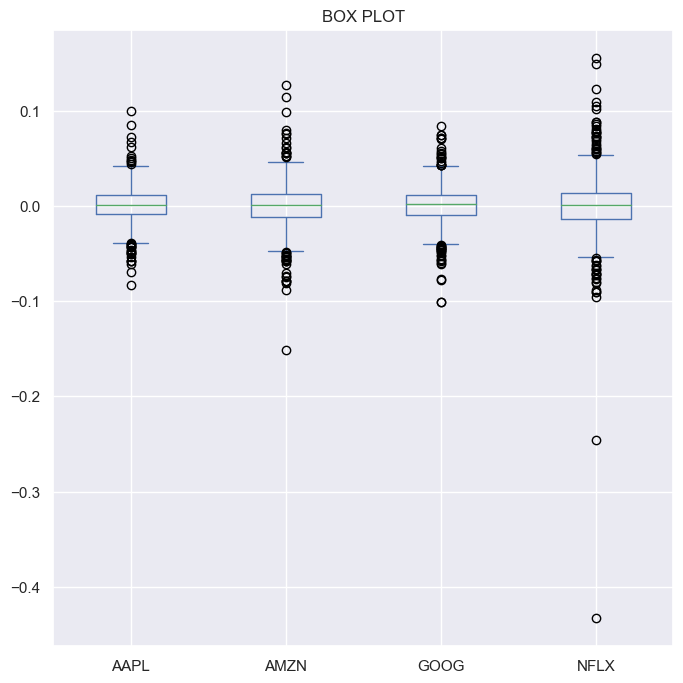

In [52]:
log[['AAPL', 'AMZN', 'GOOG', 'NFLX']].plot.box(figsize=(8,8))
plt.title('BOX PLOT')

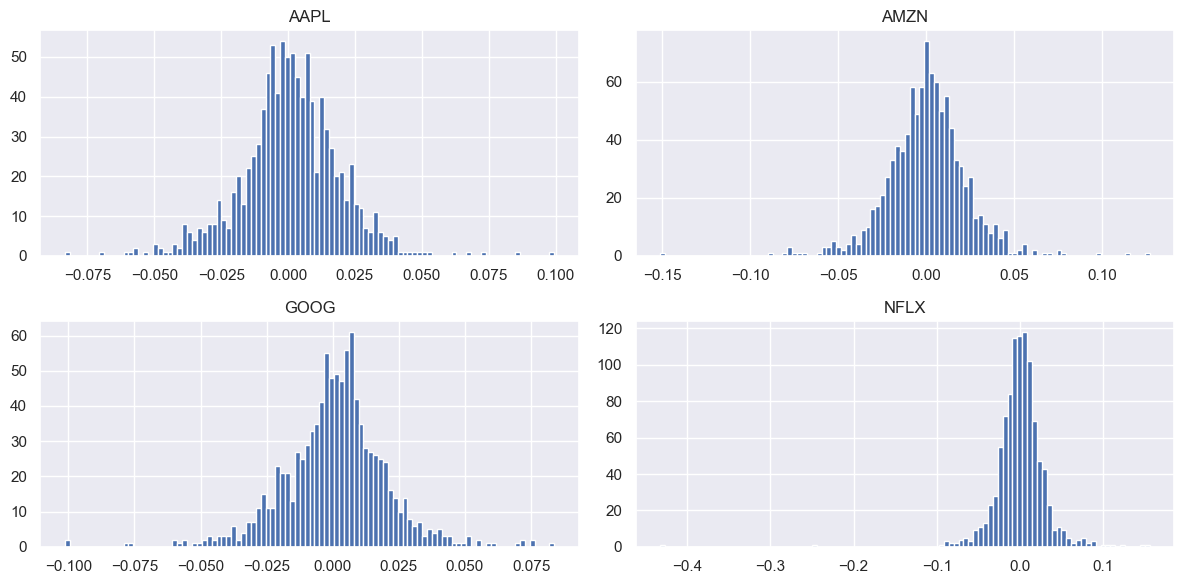

In [53]:
log.hist(bins=100,figsize=(12,6))
plt.tight_layout()

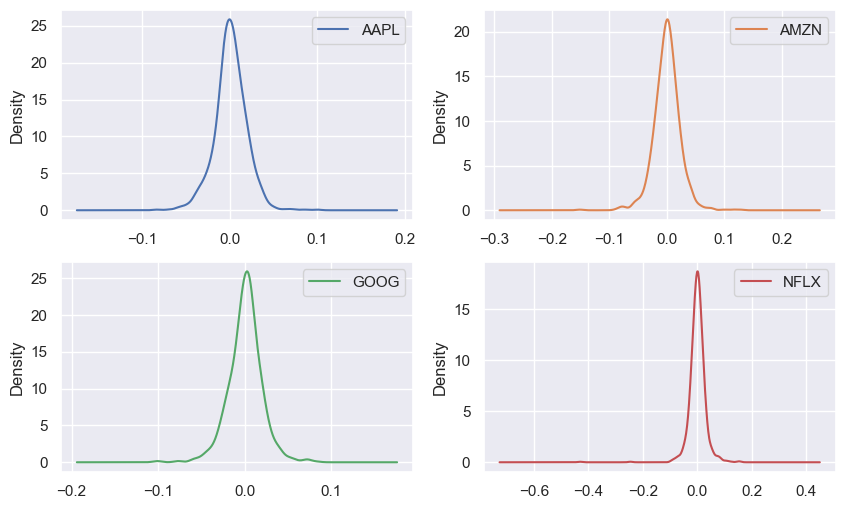

In [54]:
log.plot(kind='density', subplots=True, layout=(2,2), sharex=False, figsize=(10, 6))
plt.show()

### Interprétation
Après application d'un filtre de différentiation d'ordre 1 les actifs constituants notre portefeuille semble s'ajuster à une loi normale ce qui nous donne l'autorisation de procedé à une analyse moyenne-variance proposer par la docteur H. Markowitz, pour identifier l'allocaton optimal (répartition optimale du budget) qui nous permettra de soit maximiser le ratio de sharpe, ou soit de minimiser le risque associé à notre portefeuille.



### Ratio de Sharpe
Le ratio de Sharpe, développé par William F. Sharpe, est une mesure permettant d'évaluer le rendement d'un investissement par rapport à son niveau de risque. Il indique le rendement moyen excédentaire par unité de risque total. La volatilité, mesurée par l'écart-type des rendements, est utilisée comme mesure du risque.

**Exemple concret d'application du ratio de Sharpe :** Imaginez un investisseur envisageant d'ajouter des fonds de couverture à son portefeuille d'actions et d'obligations. Si le portefeuille a rapporté 15 % au cours de l'année précédente, avec un taux sans risque de 3,5 % et une volatilité de 12 %, le ratio de Sharpe serait de 95,8 %, calculé comme (15 % - 3,5 %) / 12 %.

### Les Rendements Attendus du Portefeuille
Les rendements attendus du portefeuille font référence aux gains ou pertes réalisés sur un portefeuille de placements contenant plusieurs types de placements sur une période donnée. C'est la moyenne des variations en pourcentage des cours des actions du portefeuille.

### L'Écart Type du Portefeuille
La volatilité est mesurée comme l'écart type des rendements des actions constituant le portefeuille. Cette mesure indique la dispersion des rendements autour de la moyenne. La racine carrée de la variance du portefeuille donne l'écart type.

### Poids de chaque Actif
Le poids de chaque actif dans le portefeuille représente la proportion de l'investissement total qui lui est allouée. Ces poids déterminent la répartition des fonds dans le portefeuille.

### Remarque
Ces métriques sont essentielles pour comprendre et évaluer les caractéristiques d'un portefeuille d'investissement. Elles seront utiles pour identifier les portefeuilles optimaux selon différentes stratégies d'investissement, en suivant les principes de la théorie des portefeuilles.


## 5/ OPTIMISATION DU PORTEFEUILLE : SIMULATION DE MONTE CARLO

Dans cette simulation de Monte Carlo, nous générons aléatoirement des poids pour chaque actif financier, puis nous utilisons ces poids pour construire différents portefeuilles. Pour chaque portefeuille ainsi construit, nous calculons ensuite les métriques de performance telles que le rendement, la volatilité et le ratio de Sharpe. Ces métriques nous aident à évaluer la performance de chaque portefeuille simulé.

En fin de compte, cette approche nous permet d'explorer une large gamme de combinaisons d'allocation d'actifs possibles et d'évaluer leurs performances potentielles. Cela nous aide à prendre des décisions éclairées lors de la construction de portefeuilles d'investissement en identifiant ceux qui présentent le meilleur équilibre entre rendement et risque.

In [56]:
# initialistation des commposent
np.random.seed(0)
nb_portfolio = 10000
# matrice de metrique des poids (allocation optimal) pour chaque iteration
all_weights = np.zeros((nb_portfolio, len(stock_price.columns)))

# matrice de metrique du rendements espéré possible du portefeuille pour chaque iteration
ret_arr = np.zeros(nb_portfolio)

# matrice de metrique de la volatilité possible du portefeuille pour chaque iteration
vol_arr = np.zeros(nb_portfolio)

# matrice de metrique du ration de sharpe possible du portefeuille pour chaque iteration.
sharpe_arr = np.zeros(nb_portfolio)

#calcul du log_return
log_return = np.log(1 + stock_price.pct_change())

# debut de la simulation
for ind in range(nb_portfolio):

    # calcul des poids
    weights = np.array(np.random.random(len(stock_price.columns)))
    weights = weights / np.sum(weights)

    # ajouter des poids caluler dans la matrice de metrique des poids
    all_weights[ind, :] = weights.round(3)

    # calcul du rendement espere du portefeuille
    ret_arr[ind] = np.sum((log_return.mean() * weights) * 252)

    # calcul de la volatilité du portefeuille
    vol_arr[ind] = np.sqrt(
        np.dot(weights.T, np.dot(log_return.cov() * 252, weights))
    )

    # calcul du ratio de sharp.
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

# creation d'un cadre de données de référence pour les metriques
simulations_data = [ret_arr, vol_arr, sharpe_arr, all_weights]

simulations_df = pd.DataFrame(data=simulations_data).T

# assignation des colonnes.
simulations_df.columns = ['Returns','Volatility','Sharpe Ratio','Portfolio Weights']

# conserver la caractere numerique de nos metrique
simulations_df = simulations_df.infer_objects()

# affichage des resultats.
print('')
print('='*75)
print('SIMULATIONS RESULT:')
print('-'*75)
print(simulations_df)
print('-'*75)


SIMULATIONS RESULT:
---------------------------------------------------------------------------
       Returns  Volatility  Sharpe Ratio             Portfolio Weights
0     0.152877    0.292704      0.522293   [0.228, 0.297, 0.25, 0.226]
1     0.134147    0.316376      0.424012  [0.177, 0.269, 0.182, 0.372]
2     0.177095    0.279231      0.634226  [0.361, 0.144, 0.297, 0.198]
3     0.144502    0.300012      0.481653   [0.344, 0.56, 0.043, 0.053]
4     0.129677    0.321915      0.402829  [0.008, 0.333, 0.311, 0.348]
...        ...         ...           ...                           ...
9995  0.135911    0.305594      0.444744  [0.221, 0.372, 0.135, 0.272]
9996  0.131474    0.316806      0.414999  [0.246, 0.294, 0.093, 0.367]
9997  0.152658    0.298889      0.510753   [0.301, 0.195, 0.19, 0.314]
9998  0.167021    0.288754      0.578419  [0.372, 0.131, 0.222, 0.275]
9999  0.152248    0.298664      0.509762   [0.342, 0.202, 0.146, 0.31]

[10000 rows x 4 columns]
-------------------------

In [29]:
# Option maximisation du ratio de sharp.
max_sharpe_ratio = simulations_df[['Returns', 'Volatility', 'Sharpe Ratio']].loc[simulations_df['Sharpe Ratio'].idxmax()]

# Option minimisation de la volatilité.
min_volatility = simulations_df[['Returns', 'Volatility', 'Sharpe Ratio']].loc[simulations_df['Volatility'].idxmin()]

# Allocation optimal
allocation = pd.DataFrame(data=all_weights)
allocation.columns = ['AAPL', 'AMZN', 'GOOG', 'NFLX']
alloc_max_sr = allocation.loc[simulations_df['Sharpe Ratio'].idxmax()]
alloc_min_vol = allocation.loc[simulations_df['Volatility'].idxmin()]

print('')
print('='*35)
print('MAX SHARPE RATIO')
print('*'*35)
print(max_sharpe_ratio,'\n')
print('*'*35)
print("Allocation optimal")
print(alloc_max_sr)
print('-'*35)
print("\n")
print('='*35)
print('MIN VOLATILITY')
print('*'*35)
print(min_volatility,'\n')
print('*'*35)
print("Allocation optimal")
print(alloc_min_vol)
print('-'*35)


MAX SHARPE RATIO
***********************************
Returns         0.224971
Volatility      0.269409
Sharpe Ratio    0.835054
Name: 812, dtype: float64 

***********************************
Allocation optimal
AAPL    0.549
AMZN    0.005
GOOG    0.442
NFLX    0.004
Name: 812, dtype: float64
-----------------------------------


MIN VOLATILITY
***********************************
Returns         0.214726
Volatility      0.268294
Sharpe Ratio    0.800340
Name: 1473, dtype: float64 

***********************************
Allocation optimal
AAPL    0.531
AMZN    0.041
GOOG    0.388
NFLX    0.040
Name: 1473, dtype: float64
-----------------------------------


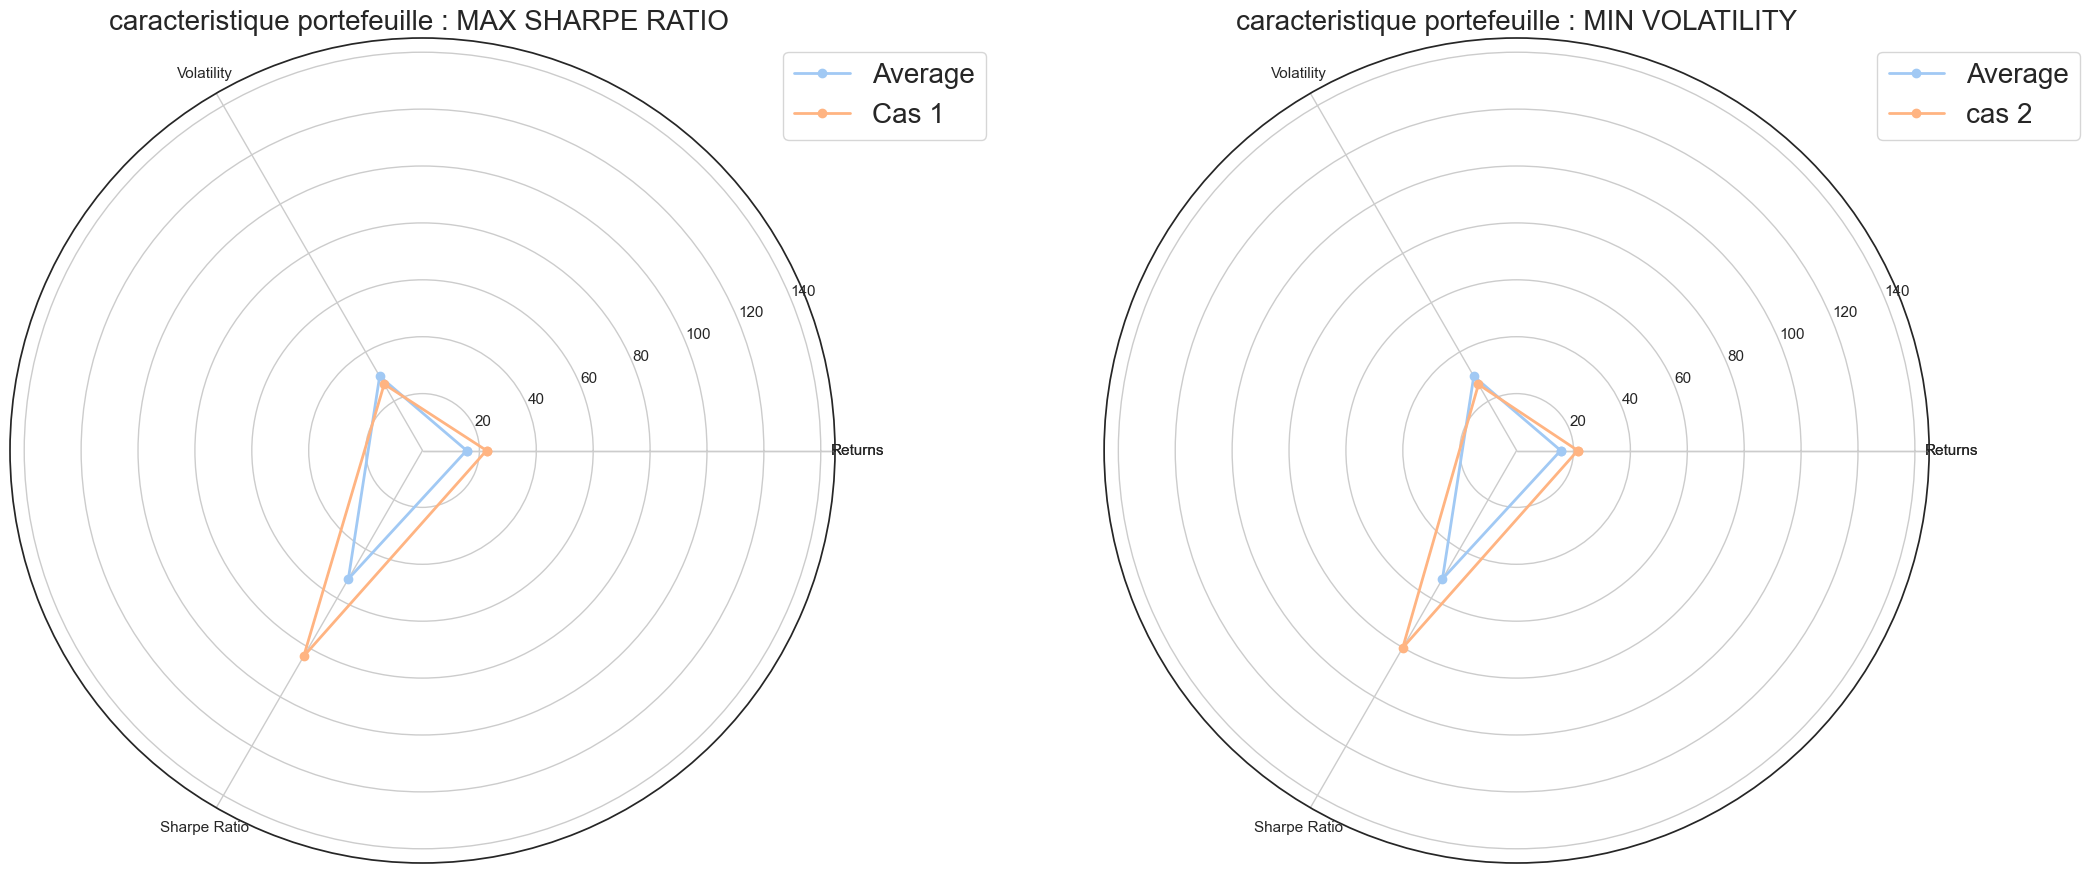

In [58]:
# creation d'une table resumant le caracteristique d'optimalité

dat = pd.concat([max_sharpe_ratio,min_volatility],axis = 1) *100
dat.columns = ['MAX SHARPE RATIO ', 'MIN VOLATILITY']
lab = ['caracteristique portefeuille : MAX SHARPE RATIO ', 'caracteristique portefeuille : MIN VOLATILITY']
dat['index'] = ['Returns', 'Volatility', 'Sharpe Ratio']
dat.set_index('index')

# implematation de element du graphique

labels = np.array(['Returns', 'Volatility', 'Sharpe Ratio'])
dataLenth = 3 

val_mean    = []
for c in ['Returns', 'Volatility', 'Sharpe Ratio']:
    val_mean.append(simulations_df[c].mean()*100)
    
datatype = ['caracteristique MAX SHARPE RATIO ', 'caracteristique MIN VOLATILITY']
for i in range(2):
    datatype[i] = list(dat.reset_index().T.drop(index=['index','level_0']).iloc[i])
    datatype[i] = np.concatenate((datatype[i], [datatype[i][0]]))

angles = np.linspace(0, 2*np.pi, dataLenth, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))
val_mean  = np.concatenate((val_mean, [val_mean[0]]))
labels = np.concatenate((labels, [labels[0]]))

sns.set(style="white", palette="pastel")
fig = plt.figure(figsize=(40,75))
for i in range(2):
    ax = fig.add_subplot(6, 3, i+1, polar=True)
    ax.plot(angles, val_mean, 'o-', linewidth=2, label='Average') 
    ax.plot(angles, datatype[i], 'o-', linewidth=2, label=['Cas 1','cas 2'][i])
    ax.set_thetagrids(angles * 180/np.pi, labels) 
    ax.set_ylim(0,145)  
    ax.set_title(lab[i], fontsize=20)
    ax.legend(fontsize=20, bbox_to_anchor=(1.2, 1))

* Ratio de Sharpe élevé : Les deux portefeuilles ont des ratios de Sharpe plus élevés que la moyenne, ce qui indique un rendement ajusté au risque plus attractif.
* Rendement élevé : Les deux portefeuilles présentent des rendements plus élevés que la moyenne, ce qui est un indicateur positif pour les investisseurs.
* Volatilité réduite : Les deux portefeuilles ont une volatilité plus faible que la moyenne, ce qui signifie qu'ils sont moins sensibles aux fluctuations de marché et offrent une certaine stabilité.

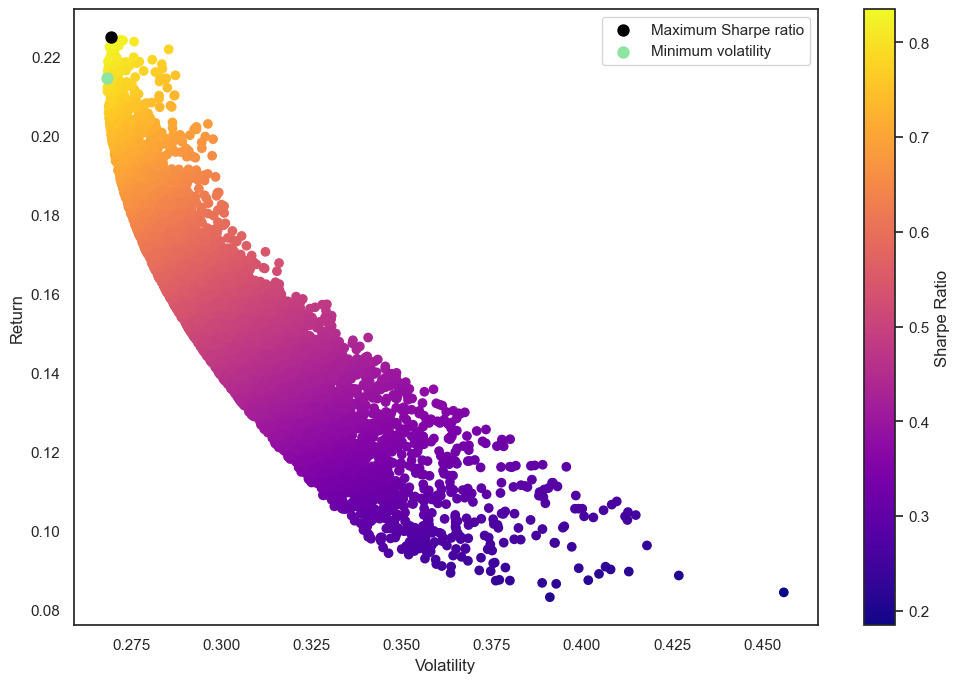

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(simulations_df['Volatility'],simulations_df['Returns'],
            c = simulations_df['Sharpe Ratio'],cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Ajout du RS max
max_sr_ret = simulations_df['Returns'][simulations_df['Sharpe Ratio'].idxmax()]
max_sr_vol = simulations_df['Volatility'][simulations_df['Sharpe Ratio'].idxmax()]
min_vol_vol = simulations_df['Volatility'][simulations_df['Volatility'].idxmin()]
min_vol_ret = simulations_df['Returns'][simulations_df['Volatility'].idxmin()]

plt.scatter(max_sr_vol,max_sr_ret,marker='.',c='black',s=250,edgecolors='black',label='Maximum Sharpe ratio')
plt.scatter(min_vol_vol,min_vol_ret,marker='.',c='g',s=250,edgecolors='g',label='Minimum volatility')
plt.legend();

Sur ce graphique, l'axe horizontal représente le niveau de risque, tandis que l'axe vertical représente le niveau de rendement attendu associé à chaque portefeuille. Il représente graphiquement chacun les portefeuilles générés de manière aléatoire suite à la simulation de Monte-Carlo. En particulier, il met en évidence les portefeuilles ayant les caractéristiques correspondant à la maximisation du ratio de Sharpe et ceux correspondant à la minimisation de la volatilité.

<span style="color: #2660B2">REFERENCE</span>
==

``SOURCE ECRITE``
* INVESTING PORTFOLIO MANAGEMENT [investopedia](https://www.investopedia.com/terms/m/modernportfoliotheory.asp)
* Deep Learning for Portfolio Optimisation [Oxford-Man Institute of Quantitative Finance](https://arxiv.org/pdf/2005.13665v1.pdf#page=9)
* Portfolio Optimization with Python using Efficient Frontier with Practical Examples [ML+](https://www.machinelearningplus.com/machine-learning/portfolio-optimization-python-exampl)
* Note de cours du [Maître de conférences de sciences économiques, Ali Skalli](http://skalli.u-paris2.fr/enseignements.php)

``SOURCE VIDEO``
* Portfolio Allocation, No Short Sales, and Solver [podcast resources](https://archive.org/search.php?query=creator%3A%22phil-davies%40uiowa.edu%22)